#  Correlation and Convolution of Images

recommended reading:

Computer Vision: Algorithms and Applications 2nd Edition

Richard Szeliski

The book can be freely downloaded from

https://szeliski.org/Book

correlation and convolution is covered in chapter 3 of the book

In [2]:
%matplotlib inline
import pandoc
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Formulas / Correlation

In the computer vision book, correlation is defined by equation:

$$
g(x,y) = \sum_{u,v} f(x+u, y+v) \cdot h(u,v)
$$

Let us make some specific assumptions to get to a formulation which is more useful for programming or to get further insight:

$f(x, y)$ denotes the *original* image. It is defined on a set of value pairs $x,y$. For the original image let us assume a finite range for $x$ and $y$. (For some applications it may be necessary to extend the image beyond this range. But currently let us assume, that $f(x,y) = 0$ outside the range of $x$ and $y$ defined above).

$$0 \lt x \lt N_x$$

and

$$0 \lt y \lt N_y$$

Function $h(u,v)$ the *kernel* function. Let $u$ defined for 

$$-k_{u,l} \le u \le k_{u,h}$$

and in a similar way for $v$

$$-k_{v,l} \le v \le k_{v,h}$$


Now the summation formula for the correlation operation can be rewritten more explictly:

$$
g(x,y) = \sum_{u=-k}^{k}\sum_{v=-k}^{k}  h(u,v) \cdot f(x+u, y+v)
$$

This formula can be quite often found in computer vision literature.

## Discussion

The specific choice setting the range of indices of the kernel function centered at $u=0, v=0$ means that the *central value* $h(0,0)$ always is the weighting factor for the image point $f(x,y)$. 

Therefore correlation function $g(x,y)$ can be interpreted as the *weighted contribution* of image points in the vicinity of the original image point $f(x,x)$. How large this vicinity is, depends on the number of samples of the kernel $h(u,v)$.

Even under the assumption we made for the original image $f(x, y)$ being defined only for $x : [0, ..., N_x-1]$ and $y : [0, ..., N_y-1]$ (and 0 outside this range), the correlation $g(x,y)$ is defined for a larger range of $x$ and $y$ values.

But by what amount is it larger ?

From the *finite range condition* of the original image $f()$ we observe:

$$
0 \lt x+u \le N_x - 1
$$

$$
-u \lt x \le N_x - 1 -u
$$

$$
0 \lt y+v \le N_y - 1
$$

$$
-v \lt y \le N_y - 1 -v
$$

Since $min(-u) = -k$ and $max(N_x - 1 -u) = N_x - 1 + k$ and $min(-v) = -k$ and $max(N_y - 1 -v) = N_y - 1 + k$ the correlation function $g(x,y)$ is defined in the extended range:

$$
-k \lt x \le N_x - 1 + k
$$

$$
-k \lt y \le N_y - 1 + k
$$


The figure shows the indexing schema of the kernel function with a center value $h(0,0)$. The kernel can interpreted as a matrix with $N_v = 2 \cdot k$ rows and $N_u = 2 \cdot k$ columns.

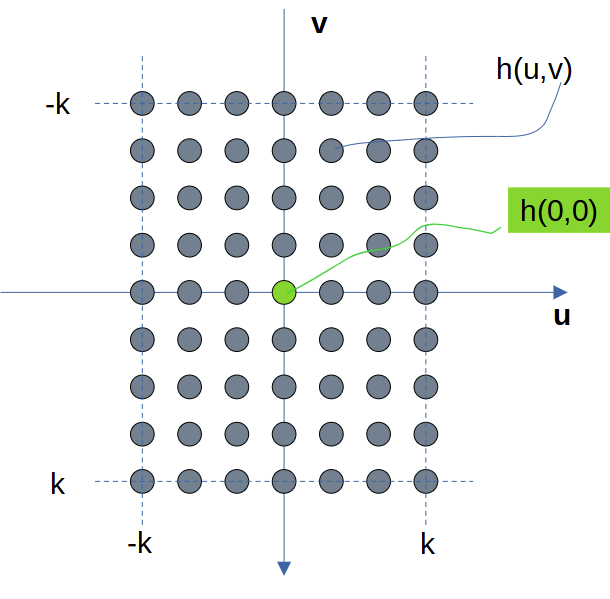

## Alternate formulation of correlation function

Previously centered representation of the kernel function $h(u,v)$. But other representation should be equally possible. In fact the OpenCV library uses a indexing scheme of the kernel function which uses only positive indices and allows to choose the center / origin of the kernel function.

The figure below shows the indexing scheme used in OpenCV's function `filter2D`.

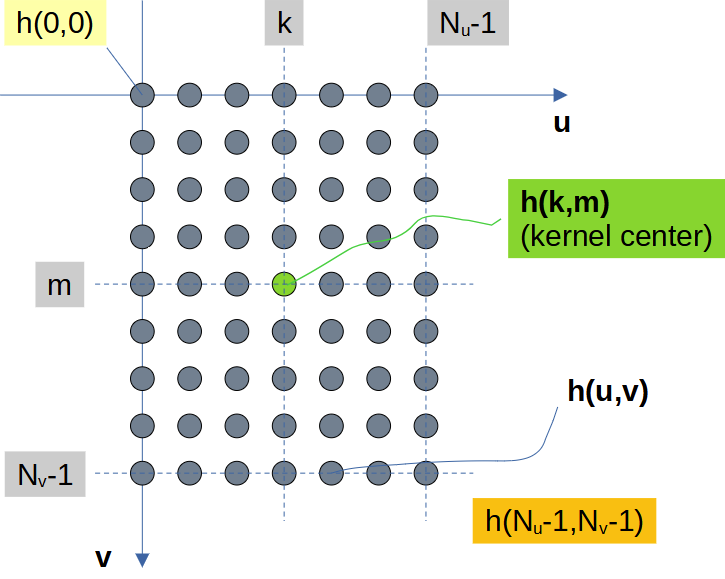

The kernel is described by indices $u$ with $0 \lt u \lt N_u - 1$ and $v$ with $0 \lt v \lt N_v - 1$. The center $h(k,m$ of the kernel can be chosen for $k$ and $m$ in the range:

$$0 \lt k \lt N_u - 1$$

$$0 \lt m \lt N_v - 1$$

Thus it is not required to choose the reference position of the kernel in the center of the kernel. We could if as well choose $k=0, m=0$ (upper left element of kernel) or $k=N_u-1, m=N_v-1$ (lower right element of kernel).

## Correlation as used in OpenCv's function `filter2D`

$$
g(x,y) = \sum_{u=0}^{N_u - 1}\sum_{v=0}^{N_v -1}  h(u,v) \cdot f(x - k +u, y - m + v)
$$

 

To see why $h(k,m)$ is named the *kernel center* set $u=k$ and $v=m$ in the formula:

$$
h(k,m) = h(k,m) \cdot f(x, y)
$$

As before we explore the range of $x$ and $y$ for which the correlation $g(x,y)$ is defined:

$$
0 \lt x - k +u \lt 𝑁_x−1
$$

$$
k - u \lt x \lt 𝑁_x−1 +k -u
$$

and

$$
0 \lt y - m + v \lt 𝑁_y−1
$$

$$
m - v \lt y \lt 𝑁_y−1 + m - v 
$$

The correlation function $𝑔(𝑥,𝑦)$ is defined for the extended range:

$$𝑘 - N_u + 1 \lt 𝑥 \lt 𝑁_x − 1 + 𝑘$$

$$m - N_v + 1 \lt y \lt 𝑁_y −1 + m $$

While the original image $f(x,y)$ has $N_x$ columns and $N_y$ rows and represents a $N_y \cdot N_x$ pixel image the correlation operation represents an *image* with $\left(N_y + N_v -1\right) \cdot \left(N_x + N_u -1\right)$ pixel image.

## Correlation as used Numpy's/Scipy's function correlation function

Both libraries do not include an explicit formula to compute the 2D-correlation of the 2D-arrays. Image and kernel are just represented as matrices. Nevertheless the correlation result is still represented by a matrix with
$N_y + N_v -1$ columns and $N_x + N_u -1$ rows.

# Formulas / Convolution

## Recap / Correlation

In https://szeliski.org/Book correlation is defined by equation:

$$
g(x,y) = \sum_{u,k} f(x+u, y+v) \cdot h(u,v)
$$

and for convolution:

$$
g(x,y) = \sum_{u,k} f(x-u, y-v) \cdot h(u,v)
$$

A more practical formula for correlation is given in the description of OpenCv's function `filter2D`

$$
g(x,y) = \sum_{u=0}^{N_u - 1}\sum_{v=0}^{N_v -1}  h(u,v) \cdot f(x - k + u, y - m + v)
$$

Accordingly a similar equation can be provided for convolution:

$$
g(x,y) = \sum_{u=0}^{N_u - 1}\sum_{v=0}^{N_v -1}  h(u,v) \cdot f(x + k - u, y + m - v)
$$